<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

# Desafío - Regularización

Luis Porras

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la seccióncorrespondiente.

## Ejercicio 1: Preparación del Ambiente de Trabajo

* Importe las librerías básicas
* Importe los métodos asociados a regularización
* Importe la base de datos

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# Configuración de gráficas
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["figure.dpi"] = 80
sns.set_style('darkgrid')

# Liberías de Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [2]:
# Importación de Base de datos
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Ejercicio 2: Análisis exploratorio

* Identifique el tipo de datos de cada columna.

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Podemos ver que la mayoria de atributos son decimales y la columna quality son valores enteros

* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

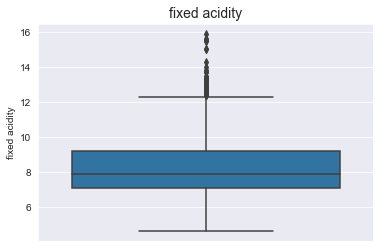

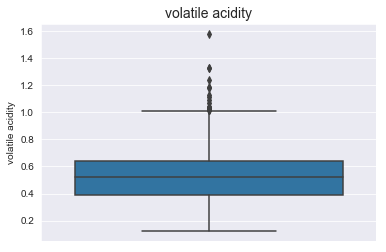

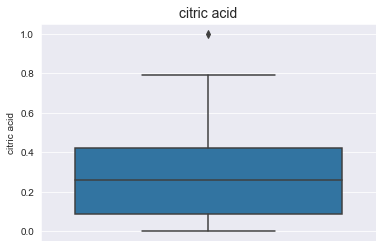

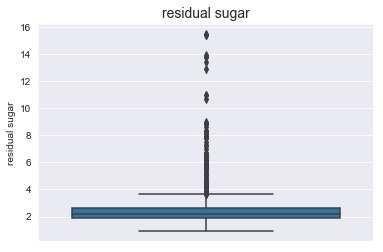

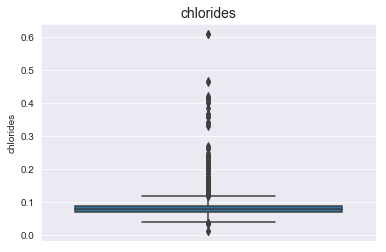

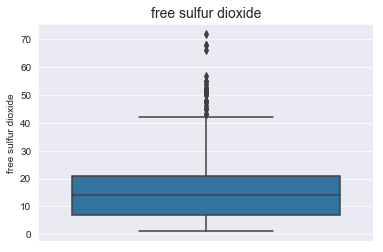

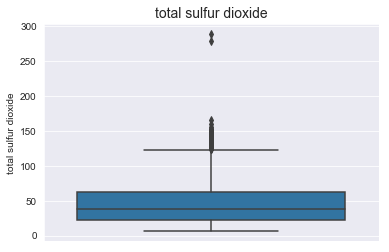

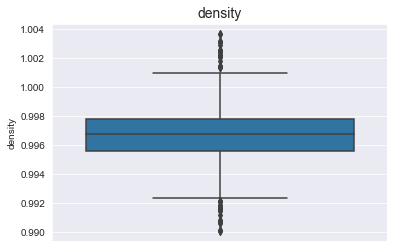

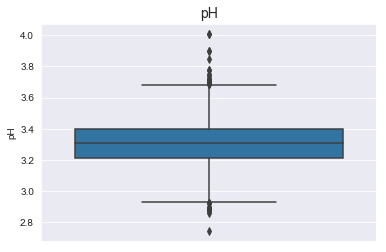

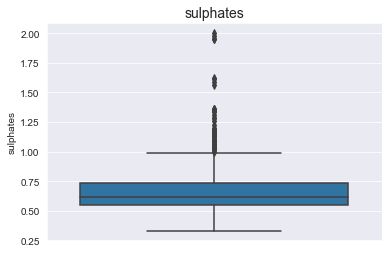

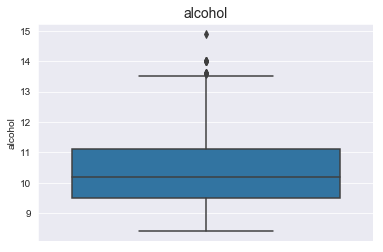

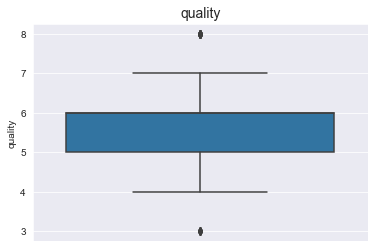

In [4]:
for col_name, col in df.iteritems():
    sns.boxplot(col, orient='v').set_title(col_name, size=14)
    plt.show()

Se observa que todas las variables poseen valores outliers,
mayormentes las sgtes variables:

* fixed acidity
* residual sugar
* chlorides
* suplphates

Para los outliers multivariadas utilizaré un pairplot para ver las relaciones de las variables con el resto.

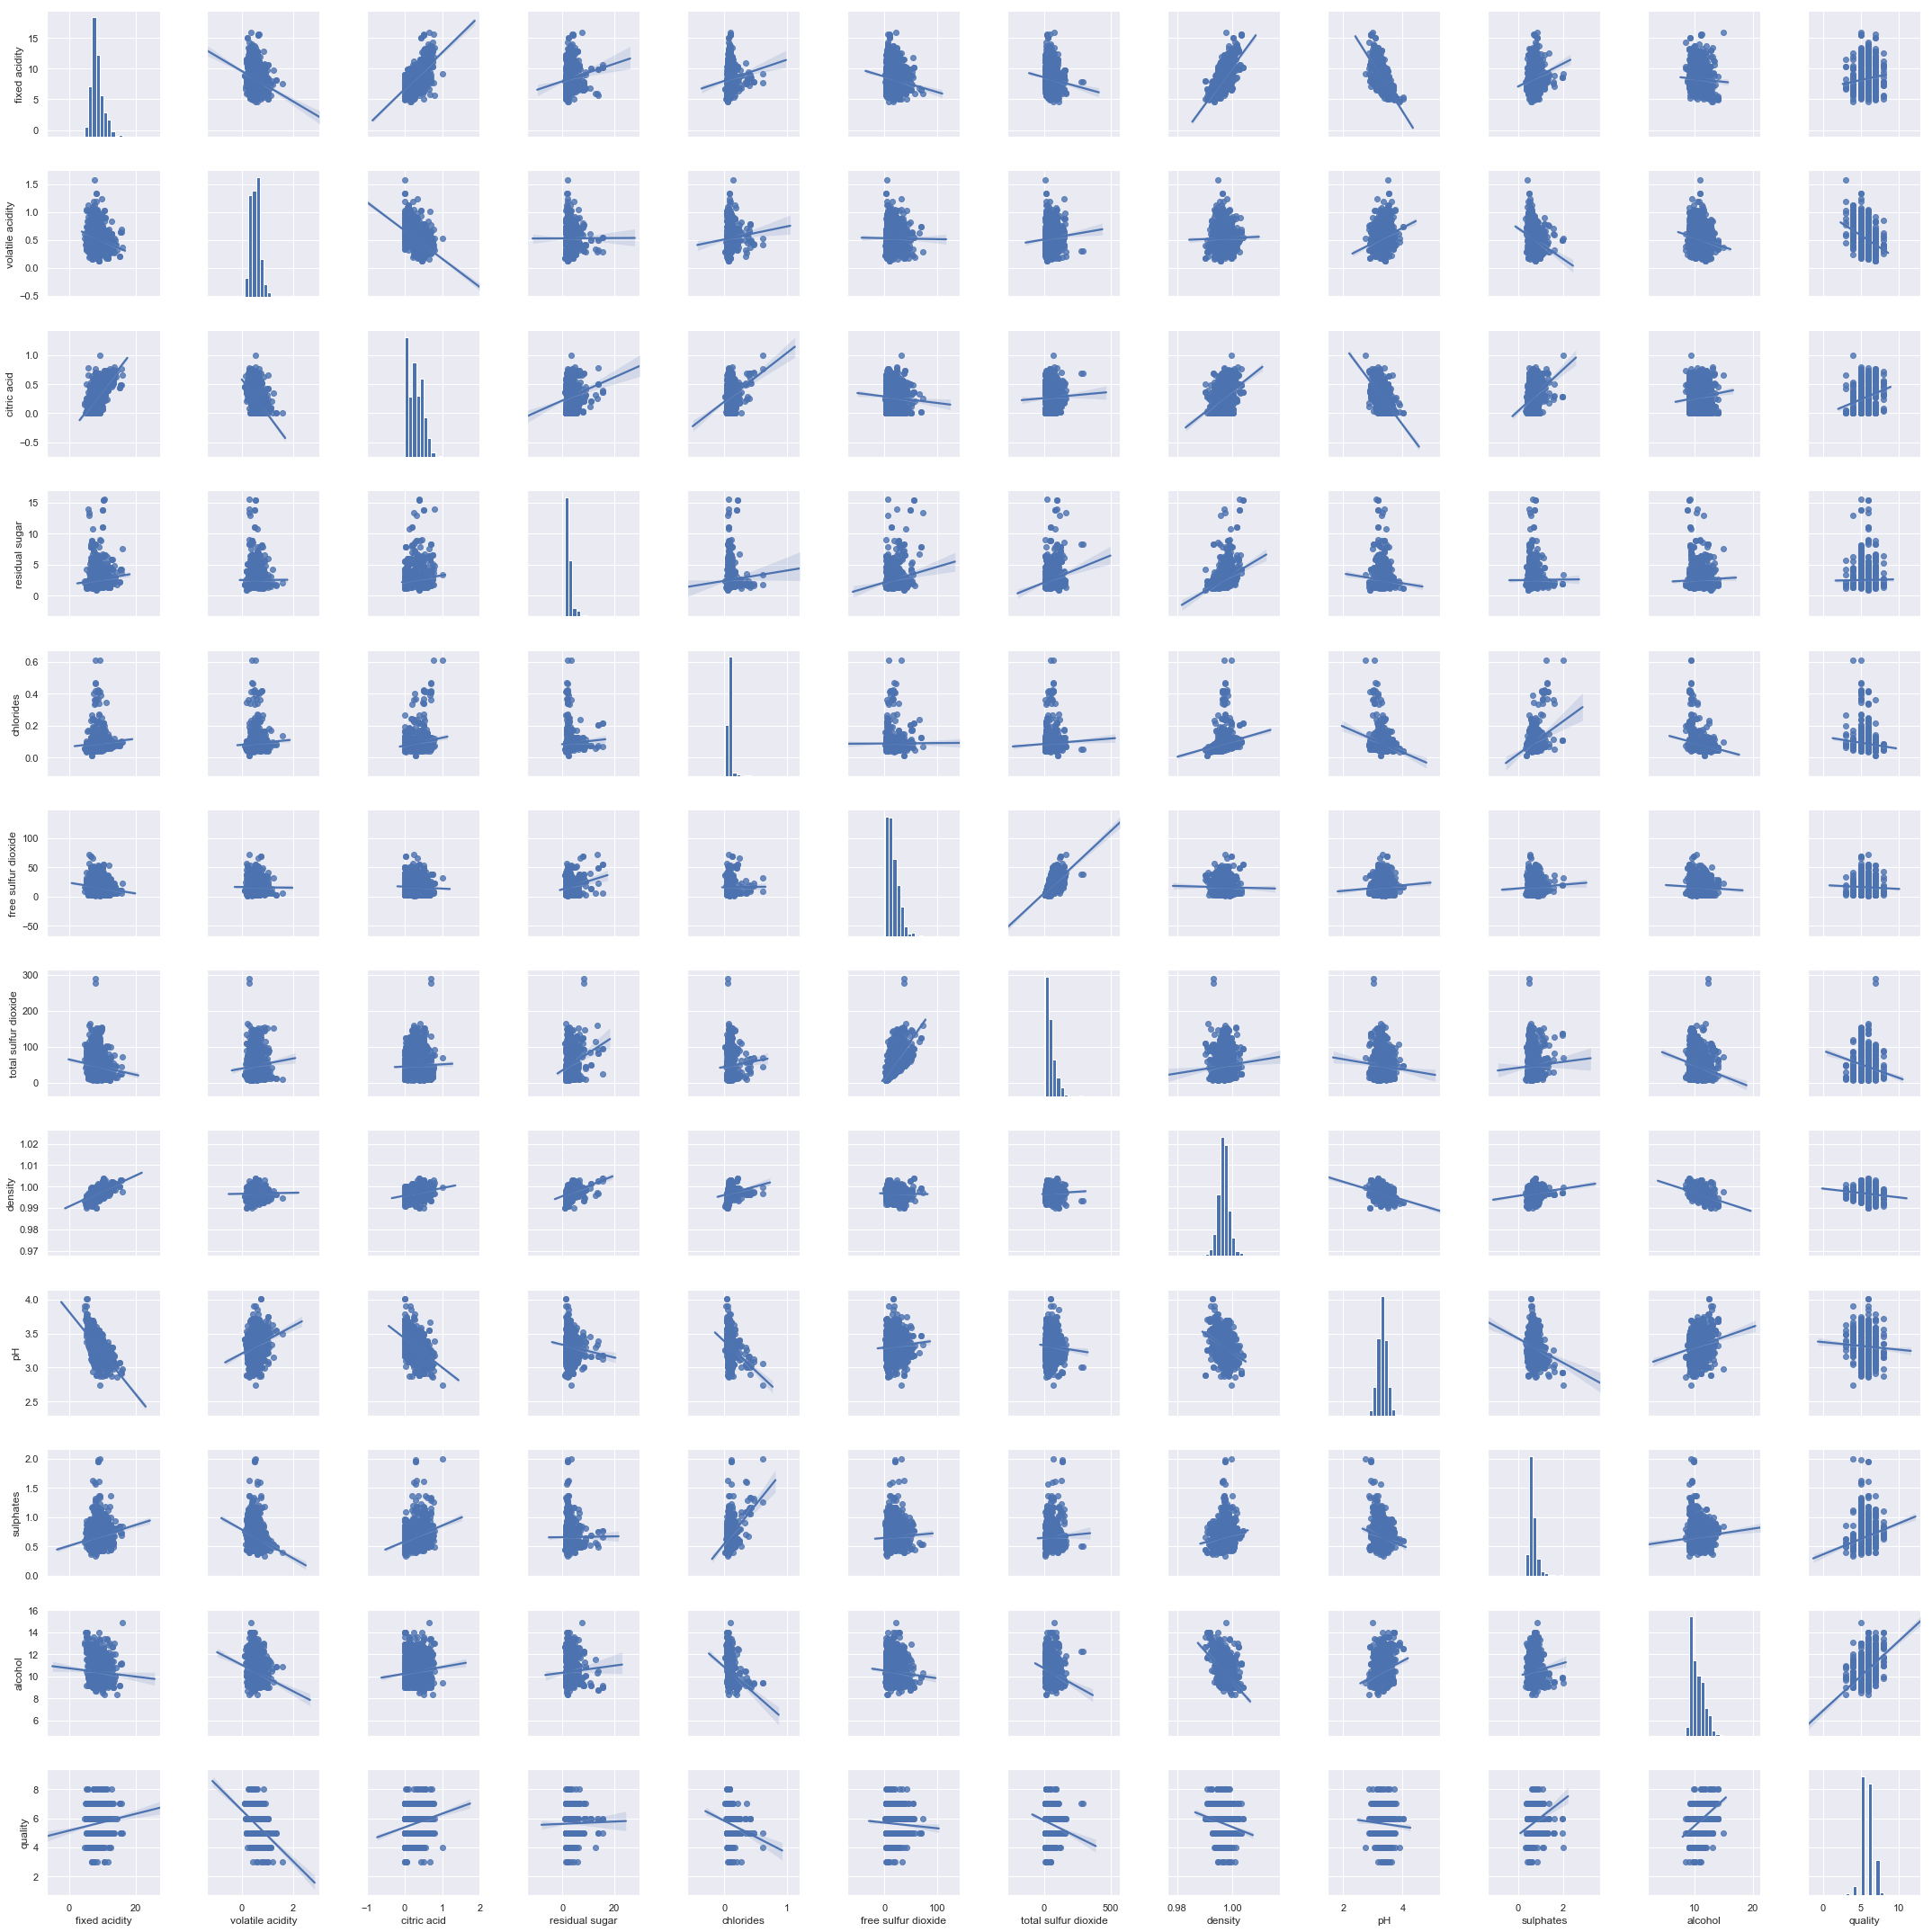

In [6]:
sns.set(rc={'figure.figsize' : (30,30)})
sns.pairplot(df, kind='reg')
plt.tight_layout()

Observamos que la variable `quality` tiene correlacion con casi todas las variables
excepto con residual sugar donde la pendiente es casi 0.

`fixed acidity`, `citric acid`, `total sulfur dioxide`, `pH`, `sulphates` tiene correlaciones distintas de 0 con gran cantidad de otras variables

## Ejercicio 3: Regularización de modelos

Genere tres modelos, correspondientes a `RidgeCV`, `LassoCV` y `ElasticNetCV`. Para cadauno de ellos implemente los siguientes pasos:

* Entrene los modelos con 10 validaciones cruzadas.
* Extraiga los coeficientes estimados, el mejor valor alpha, MAE (`median_absolute_error`)y RMSE (`mean_squared_error`) asociado a cada modelo.


* En base a la información solicitada, responda lo siguiente:
    * ¿Qué modelo presenta un mejor desempeño en base a las métricas?
    * ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

In [10]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [11]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [16]:
# se seleccionan todos los atributos independientes
X = df_scaled.iloc[:, :-1]

# se selecciona la variable independiente
y = df_scaled['quality']

N = X.shape[0]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 240008947)

In [27]:
def summary(model, X_test, y_test):
    print('Parámetro Alpha de regularización: {0}'.format(model.alpha_))
    print('\nCoeficientes: \n{0}'.format(model.coef_))
    y_hat = model.predict(X_test)
    print('\nRoot Mean Squared Error: {0}'.format(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('\nMean Squared Error: {0}'.format(mean_squared_error(y_test, y_hat)))

### RidgeCV

In [28]:
# modelo RidgeCV con 10 validaciones cruzadas
ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(X_train, y_train)
summary(model_ridge, X_test, y_test)

Parámetro Alpha de regularización: 10.0

Coeficientes: 
[ 0.20808267 -0.21374859 -0.06848812  0.05152795 -0.08743476  0.08101476
 -0.13002079 -0.16890779 -0.01789342  0.20919374  0.31258912]

Root Mean Squared Error: 0.8140065519508758

Mean Squared Error: 0.6626066666189538


### LassoCV

In [29]:
# modelo LassoCV con 10 validaciones cruzadas
lasso_cv = LassoCV(cv = 10)
model_lasso = lasso_cv.fit(X_train, y_train)
summary(model_lasso, X_test, y_test)

Parámetro Alpha de regularización: 0.0022581814293117573

Coeficientes: 
[ 0.20564057 -0.21385595 -0.06493814  0.04794343 -0.08451702  0.07706733
 -0.12539784 -0.16404181 -0.01389779  0.20682123  0.31582111]

Root Mean Squared Error: 0.8135267973632787

Mean Squared Error: 0.6618258500281532


### ElasticNet

In [33]:
# modelo elasticNet con 10 validaciones cruzadas
elastic_net_cv = ElasticNetCV(cv = 10)
model_elastic_net = elastic_net_cv.fit(X_train, y_train)
summary(model_elastic_net, X_test, y_test)

Parámetro Alpha de regularización: 0.0045163628586235155

Coeficientes: 
[ 0.20171273 -0.21321123 -0.06312399  0.04702562 -0.08482166  0.07692028
 -0.12551985 -0.16138821 -0.01520713  0.20607453  0.31638602]

Root Mean Squared Error: 0.8131936695286675

Mean Squared Error: 0.6612839441614996


**¿Qué modelo presenta un mejor desempeño en base a las métricas?**

Segun el Mean Squared Error el modelo con mejor desempeño es el ElasticNet

**¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?**

In [38]:
data = {
    'ridge': model_ridge.coef_,
    'lasso': model_lasso.coef_,
    'elastic': model_elastic_net.coef_
}
coefs_df = pd.DataFrame(data, index=X.columns)
coefs_df

,ridge,lasso,elastic
fixed acidity,0.208083,0.205641,0.201713
volatile acidity,-0.213749,-0.213856,-0.213211
citric acid,-0.068488,-0.064938,-0.063124
residual sugar,0.051528,0.047943,0.047026
chlorides,-0.087435,-0.084517,-0.084822
free sulfur dioxide,0.081015,0.077067,0.076920
total sulfur dioxide,-0.130021,-0.125398,-0.125520
density,-0.168908,-0.164042,-0.161388
pH,-0.017893,-0.013898,-0.015207
sulphates,0.209194,0.206821,0.206075


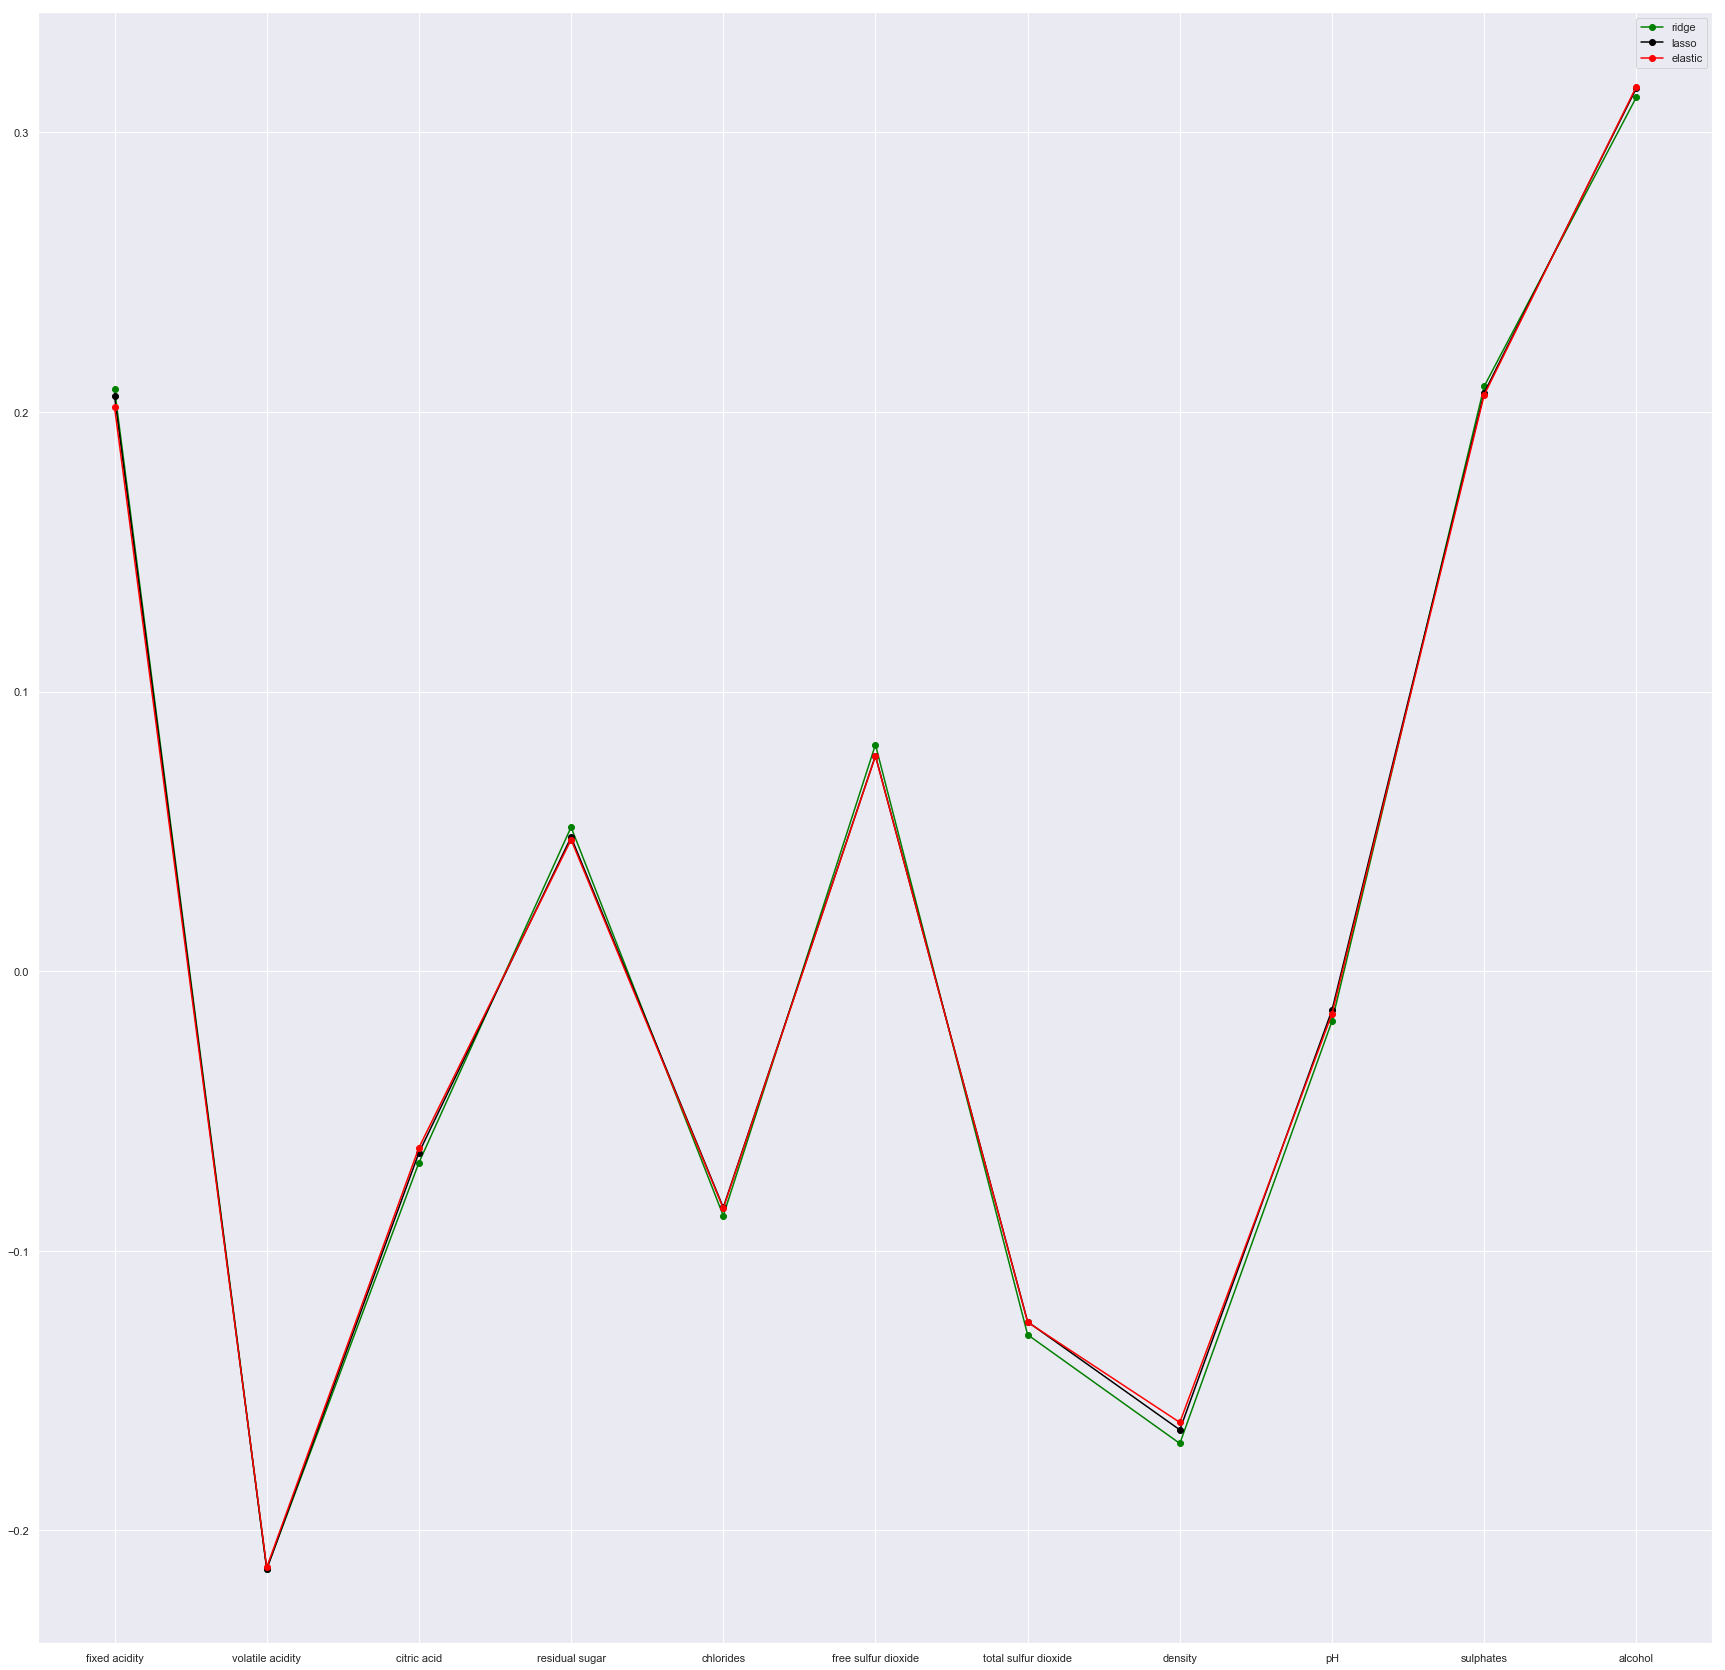

In [39]:
plt.plot(coefs_df['ridge'], 'o-', color='green')
plt.plot(coefs_df['lasso'], 'o-', color='black')
plt.plot(coefs_df['elastic'], 'o-', color='red')
plt.legend()

Podemos observar que los modelos se comportan de una forma silimar, exceptuando levemente en las
variables `free sulfur dioxide` y `density`